In [1]:
from pathlib import Path
import os
import sys
import pathlib
dir_preprocessing = os.path.join(str(pathlib.Path().resolve()))
dir_data = os.path.join(dir_preprocessing, 'data')
dir_cmip = Path(os.path.join(dir_data, 'input', 'CMIP6'))

sys.path.append(dir_preprocessing)
import historic_metric as fct

In [2]:
thresholds = [ ]
lon_bounds_t = [235, 294] #longitudinal values range from 0 to 360
lat_bounds = [24, 50]
geo_area = 'USA'
years = (1980, 2022)
nr_years = 40 
crops = ['maize', 'wheat']
#iterate over each climate model 
variable = 'tasmax'
quantiles = [0.5, 0.75]

In [3]:
climate_model_files = fct.get_cmip6_per_model(dir_cmip)
climate_models = list(climate_model_files.keys())

In [7]:
climate_models

['INM-CM5-0',
 'ACCESS-CM2',
 'IPSL-CM6A-LR',
 'CanESM5',
 'INM-CM4-8',
 'GFDL-ESM4',
 'MPI-ESM1-2-LR',
 'AWI-CM-1-1-MR',
 'EC-Earth3-Veg',
 'FGOALS-g3',
 'MPI-ESM1-2-HR',
 'BCC-CSM2-MR',
 'EC-Earth3',
 'MIROC6',
 'MRI-ESM2-0']

In [4]:
for quantile in quantiles: 
    output_dir = Path(os.path.join(dir_data, 'output', 'future', f'quantile_{quantile}'))
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    for model in climate_models:  
        data_model = fct.get_data_model(climate_model_files, model, quantile, lon_bounds_t, lat_bounds, crops, variable)
        output_file = Path(os.path.join(output_dir, f'{model}_{variable}_percentile{quantile}.nc'))
        data_model.to_netcdf(output_file)

/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Users/car

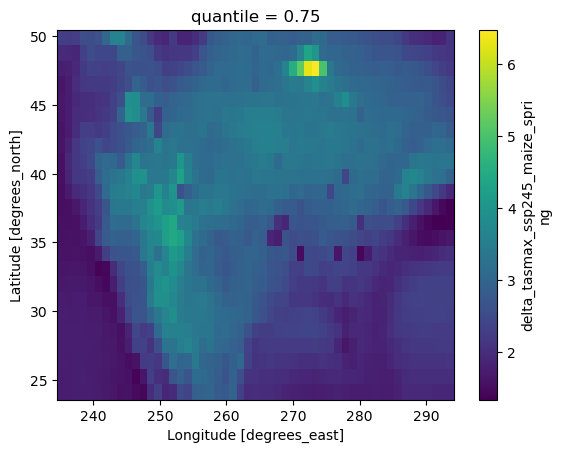

In [5]:
data_model['delta_tasmax_ssp245_maize_spring'].plot()

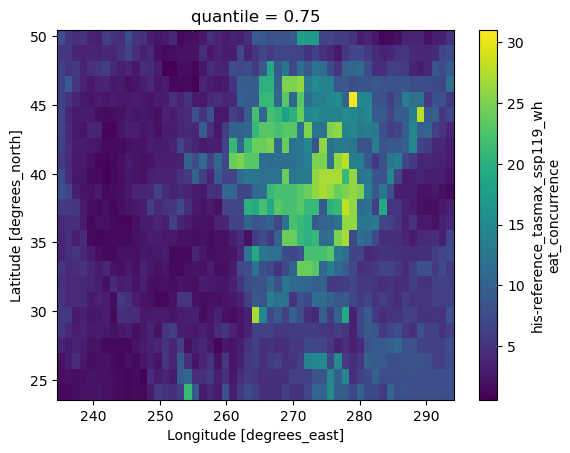

In [6]:
data_model['his-reference_tasmax_ssp119_wheat_concurrence'].plot()